# Programming_for_Data_Analysis

### Project1

### Jarlath Scarry

## Generating a random dataset

To generate a good random dataset we need to have some understanding of the type of data we want to replicate. One good way to do this is to take a sample of real data and do some analysis on it. Investigate the types of distributions the variables most closley match and also the correlation between variables.

To find the distribution that best fitts our variables we can run them through the "Fitter" library. By running the Fitter "best_fit" function we can match our sample data to the distribution that matches it best, from a library of over 100 distribution types.

Next we could use pandas corr() to find the pairwise correlation of all columns in the sample data. THis function will output a dataframe showing the correlation values between each of the variables, from 0 to 1, with 100% correlation being shown as 1. We could and use this as a guide to correlate a new random data set

We could also search for information available from existing data. For example, the average height, weight and BMI of a Male in Ireland asr 1.79 m, 89.2 kg, 28.0 respectivley [(Worlddata.info, 2022)](#section_id)


We could continue to search for more detailed breakdown of the population. Standard deviations and correlations between these values. One key piece of information for example is that Adult height in a population is normally distributed.


## Get some sample data

So lets take a data set with some variables of American presidents. I downloaded the dataset and saved it as Historical_Presidents_Physical_Data.CSV file in my local directory. [(kaggle.com, May 2021)](#section_id)


I took the CSV file, passed it into a pandas dataframe and selected the columns of interest. [(pandas.pydata, 2022)](#section_id)

I could also select the rows of interest with df.loc, but have left all rows in for now.
A description of the short_df contains some useful information, such as mean values for each column


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from fitter import Fitter

df = pd.read_csv("Historical_Presidents_Physical_Data.csv") #load "Historical_Presidents_Physical_Data" dataset directly from seaborn
short_df = df[["name","height_cm", "weight_kg","body_mass_index","birth_month","corrected_iq"]] #create a short df with targeted columns only
print()
print(short_df.describe()) #display the new short_df info to check it has been selected correctly
print()
short_df.to_csv("short_df.csv") #save to csv file


        height_cm   weight_kg  body_mass_index  birth_month  corrected_iq
count   45.000000   45.000000        45.000000    45.000000     42.000000
mean   180.155556   84.864444        26.142222     6.666667    146.833333
std      7.029016   16.328519         4.818972     3.643175      8.243006
min    163.000000   55.300000        18.600000     1.000000    130.000000
25%    175.000000   75.700000        23.400000     3.000000    140.250000
50%    182.000000   81.600000        25.000000     7.000000    145.000000
75%    185.000000   90.300000        27.100000    10.000000    151.750000
max    193.000000  154.200000        46.600000    12.000000    175.000000



## Examine this data 

### How are the variables distributed?
A histogram of the heights gives a visual indication of the distribution. Now I can check the individual variables to see if they fit a common distribution. First I checked height with Fitter package. It found that the height variables match the Beta and Normal distributions best.

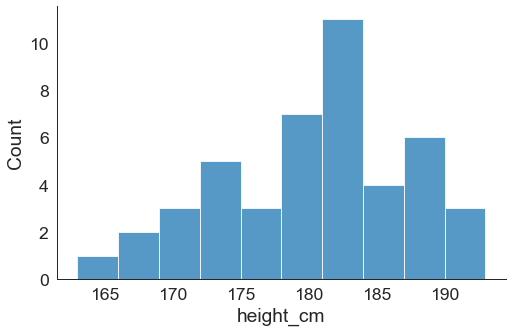

In [3]:
sns.set_style('white') #set the plot style
sns.set_context("paper", font_scale = 2) #set the plot style
sns.displot(data=short_df, x="height_cm", kind="hist", bins = 10, aspect = 1.5,) #plot histogram of heights 

### Beta distribution. What is it?

I found this description and it fits very well with our case! 
"A Beta distribution is a type of probability distribution. This distribution represents a family of probabilities and is a versatile way to represent outcomes for percentages or proportions. For example, how likely is it that Kanye West will win the next Presidential election? You might think the probability is 0.2. Your friend might think it’s 0.15. The beta distribution gives you a way to describe this." [(statisticshowto.com, beta-distribution, 18 Nov 2022)](#section_id)

### Normal distribution. What is it?

Normal distribution is a probability distribution that is symmetric about the mean, 
showing that data near the mean are more frequent in occurrence than data far from the mean. 
It is also known as the Gaussian distribution after the German mathematician Carl Friedrich Gauss who first described the phenomen.

In graphical form, the normal distribution appears as a "bell curve".

### Adult height is Normally distributed
Adult heights within a population are approximately normally distributed due to genetic and environmental variance.
https://ourworldindata.org/human-height  -- height-is-normally-distributed 
Estimating Trends in Historical Heights Komlos, J., & Kim, J. H. (1990). Estimating trends in historical heights. Historical Methods: A Journal of Quantitative and Interdisciplinary History, 23(3), 116-120.

In this case of course we are not working with a sample from a general population so we cannot assume a normal distribution. This is a good example where assuming the distribution type may lead to inaccuracies. Testing the fit with fitter against different common distribution types is a way to select an appropriate distribution type for the individual variables.

## Normal distribution examples using Python Numpy

The code below uses Numpy to generate random numbers in a normal distribution. 3 arguments in the function allow us to control the mean, the standard deviation, and the size of the normal distribution

I ran a random sample of 100 numbers, mean = 0 and standard deviation of 0.1 and plotted the random results. The data appears to be normally distributed but the bell curve is not well defined due to the small sample size. When the sample size is increased to 10000 we can see a well defined bell curve [(W3schools.com Nov 2022)](#section_id)

Also in the case where you want to generate the exact same data again, the random number generator can be seeded to start at the same point and so generate repeatable results. 

C:\Users\JS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


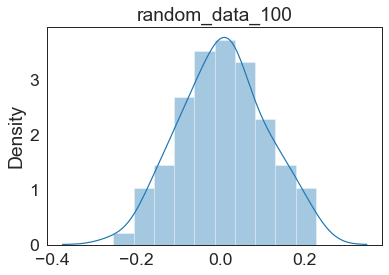

C:\Users\JS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


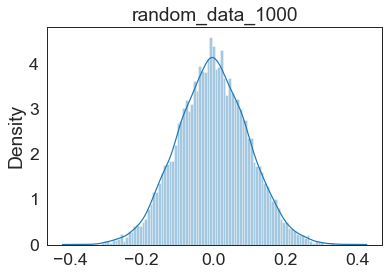

In [4]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0) #use seed to generate repeatable results
random_data_100 = random.normal(0, 0.1, 100,)

random_data_10000 = random.normal(0, 0.1, 10000)
sns.distplot(random_data_100, hist=True, bins=10).set(title='random_data_100')
plt.show()
sns.distplot(random_data_10000, hist=True, bins=100).set(title='random_data_1000')
#print(random_data_sample)
plt.show()

## Find the distribution of our data

To find the distribution that best fitts our variables I ran the height variable through the "Fitter" library. By running the Fitter "best_fit" function I matched the sample data to the distribution that fits it best from a library of over 100 distribution types. [(medium.com Sept 2022)](#section_id) 
This get_best function takes some time to run so rather than go through all distributions I specified 5 distributions to check against. This is done in a few seconds. 

Fitting 4 distributions: 100%|████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.64it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,0.739859,721.025072,-169.631480,inf,0.099356,0.728666
norm,0.742094,740.402486,-177.109087,inf,0.137971,0.327829
gamma,0.742930,743.061976,-173.251706,inf,0.142823,0.289298
burr,0.755464,758.756412,-168.692228,inf,0.178506,0.100172


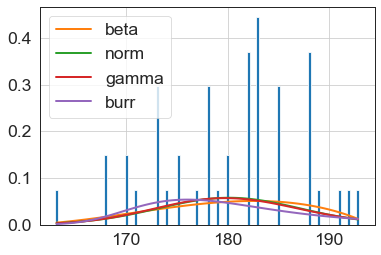

In [23]:
height_cm_fn = short_df["height_cm"].values #create function for sepal length values
f = Fitter(height_cm_fn,distributions =['gamma',"beta","burr","norm"]) #check for best fit of data
#f.get_best(method = 'sumsquare_error') #removed this as it takes 30mins to run
f.fit()
f.summary() #print a summmary

## Are the variables corrolated?

Corrolation is a statistical term used to describe how variables move in coordination with wach other. A positive corrolation between variables means if one increases so does the other. The ammount they move in relation to each other  depends on the degree of corrolation. For example in a sample of people, their weight and height could be assumed to have a reasonable degree of positive corrolation. The Pearson correlation coefficient gives a value between −1 and 1 for the corroation known as Pearson's r. [(Wikipedia.org, Pearson_correlation_coefficient Nov 2022)](#section_id)

### Find the correlation coefficent between 2 variables.

I can calculate the correlation between the height and weight of all the people using the pingouin.corr function. The table below shows correlation information between the 2 chosen variabled, with r being their Pearson correlation coefficient.  [(codespeedy.com correlation calculation between variables Nov 2022)](#section_id)

In [21]:
import pingouin

pingouin.corr(x=df['height_cm'], y=df['weight_kg'])

,n,r,CI95%,p-val,BF10,power
pearson,45,0.30484,"[0.01, 0.55]",0.041738,1.384,0.53983


## Corrolation between all the variables

I used pandas dataframe.corr() to find the pairwise correlation of all the columns in the short_df. 
This method ignores strings and blank spaces. The output is a dataframe dhowing cor

Next I used the pandas datafeame.corr() to find the pairwise correlation of all columns in the sample data. This function will output a dataframe showing the correlation values between each of the variables, from 0 to 1, with 100% correlation being shown as 1. I can now use this as a guide to correlate a new random data set.

The output heat map shows the corrolation if any between the variables. For example weight corrolates very strongly with bmi with an r value of 0.92


In [8]:
short_df.head()
pearson_correlation = short_df.corr(method='pearson')
print(pearson_correlation)

                 height_cm  weight_kg  body_mass_index  birth_month  \
height_cm         1.000000   0.304840        -0.093127    -0.174543   
weight_kg         0.304840   1.000000         0.918209     0.146847   
body_mass_index  -0.093127   0.918209         1.000000     0.224515   
birth_month      -0.174543   0.146847         0.224515     1.000000   
corrected_iq     -0.077454  -0.036846        -0.006275     0.072568   

                 corrected_iq  
height_cm           -0.077454  
weight_kg           -0.036846  
body_mass_index     -0.006275  
birth_month          0.072568  
corrected_iq         1.000000  


<AxesSubplot:>

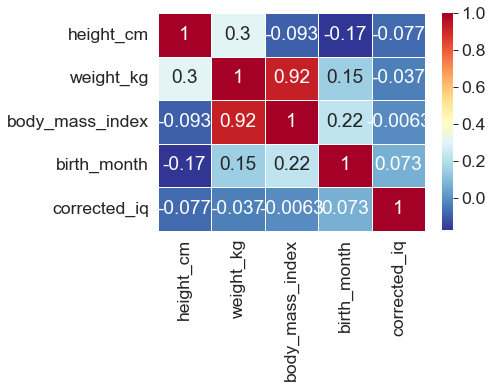

In [9]:

sns.heatmap(pearson_correlation,xticklabels=pearson_correlation.columns,
           yticklabels=pearson_correlation.columns, 
           cmap="RdYlBu_r", annot=True,linewidth=0.5,)
            #select heat map colours and reverse, so red is for hot.

#https://www.codespeedy.com/correlation-calculation-between-variables-in-python/


## Generate random data with constraints

Next step is to generate data with relative constraints based on the correlation matrix. I used scipy.stats.multivariate_normal.rvs(). This draws random samples from the multivariate normal distribution. I used the earlier corrolation matrix for the cov argument.

rvs(mean=None, cov=1, size=1, random_state=None)
https://stackoverflow.com/questions/45952895/generating-correlated-numbers-in-numpy-pandas
https://stackoverflow.com/questions/53123638/python-generating-numbers-according-to-a-corellation-matrix




In [10]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
cov = pearson_correlation
#print(cov)

measurments = mvn.rvs(mean = [180.,84.,26.,6.66,147.], cov=cov, size = 45) #random.normal (loc = 0.0, scale = 1.0, size = None) Arguments

correlated_df = pd.DataFrame(data = measurments, columns = ["height_cm", "weight_kg","body_mass_index", "birth_month","corrected_iq"])
print(correlated_df)

     height_cm  weight_kg  body_mass_index  birth_month  corrected_iq
0   179.203837  83.377573        25.638567     6.041948    146.977764
1   181.014493  82.539059        24.135289     6.087645    147.380876
2   181.614153  84.705562        26.036150     6.250639    147.885278
3   178.767889  83.322114        25.748569     4.948624    146.607049
4   178.521331  84.501948        27.159207     7.303016    147.333204
5   180.160183  83.438967        25.408218     5.795629    148.618571
6   179.684337  83.545637        25.626679     4.770131    146.283676
7   179.386921  83.898000        26.107779     4.936248    146.785188
8   178.847286  81.126536        23.428743     7.005313    147.513634
9   180.233846  84.242410        26.185219     6.217803    147.193465
10  180.010053  83.846888        25.796414     5.904742    146.739718
11  179.847160  84.558923        26.642439     5.606489    146.348145
12  179.694831  83.306991        25.390434     6.525550    148.483802
13  177.405928  84.1

## Add random names

To add names I used the faker to generate a list of American male names. I defined a function generate_names and called it to generate 45 names. I used fake.name_male(), all male since the dataset I am generating is based on past American presidents which are all male.  

https://www.youtube.com/watch?v=jSBjRur5dc8

After generating the names data frame I combined it with the earlier random data frame to give a complete dataset. The output new_df is printed showing the full dataset.

In [12]:
from faker import Faker
faker = Faker('en_US')

def generate_names():
    return {'name': faker.name_male()}

values = (generate_names() for i in range(45))
names_df = pd.DataFrame(values)
#print(names_df)

frames = [names_df, correlated_df]
new_df = pd.concat([names_df, correlated_df], axis=1, join='inner')
print(new_df)
new_df.to_csv("new_df.csv") #save to csv file

                    name   height_cm  weight_kg  body_mass_index  birth_month  \
0          Jacob Collins  179.203837  83.377573        25.638567     6.041948   
1        Bernard Coleman  181.014493  82.539059        24.135289     6.087645   
2         Anthony Barnes  181.614153  84.705562        26.036150     6.250639   
3         Kenneth Stokes  178.767889  83.322114        25.748569     4.948624   
4      Alejandro Miranda  178.521331  84.501948        27.159207     7.303016   
5          Juan Phillips  180.160183  83.438967        25.408218     5.795629   
6            Bobby Cline  179.684337  83.545637        25.626679     4.770131   
7           Robert Jones  179.386921  83.898000        26.107779     4.936248   
8         William Fields  178.847286  81.126536        23.428743     7.005313   
9           Andrew Wiley  180.233846  84.242410        26.185219     6.217803   
10       James Christian  180.010053  83.846888        25.796414     5.904742   
11        Edward Michael  17

### Comparing the data
I compared 2 variables from each data set using a scatter graph. It is clear there is some issue with the spread of the random generated data. Heights are very clustered together for some reason.

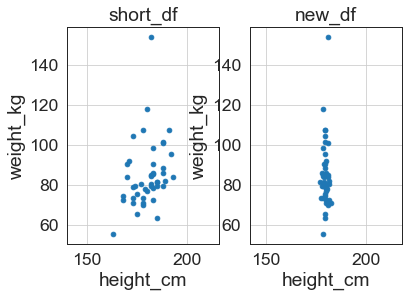

In [13]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.scatter(short_df['height_cm'], df['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.axis('equal')
plt.grid(True)
plt.title('short_df') 

plt.subplot(1,2,2)
plt.scatter(new_df['height_cm'], df['weight_kg'])
plt.xlabel('height_cm')
plt.ylabel('weight_kg')
plt.axis('equal')
plt.grid(True)
plt.title('new_df') 
plt.show() 


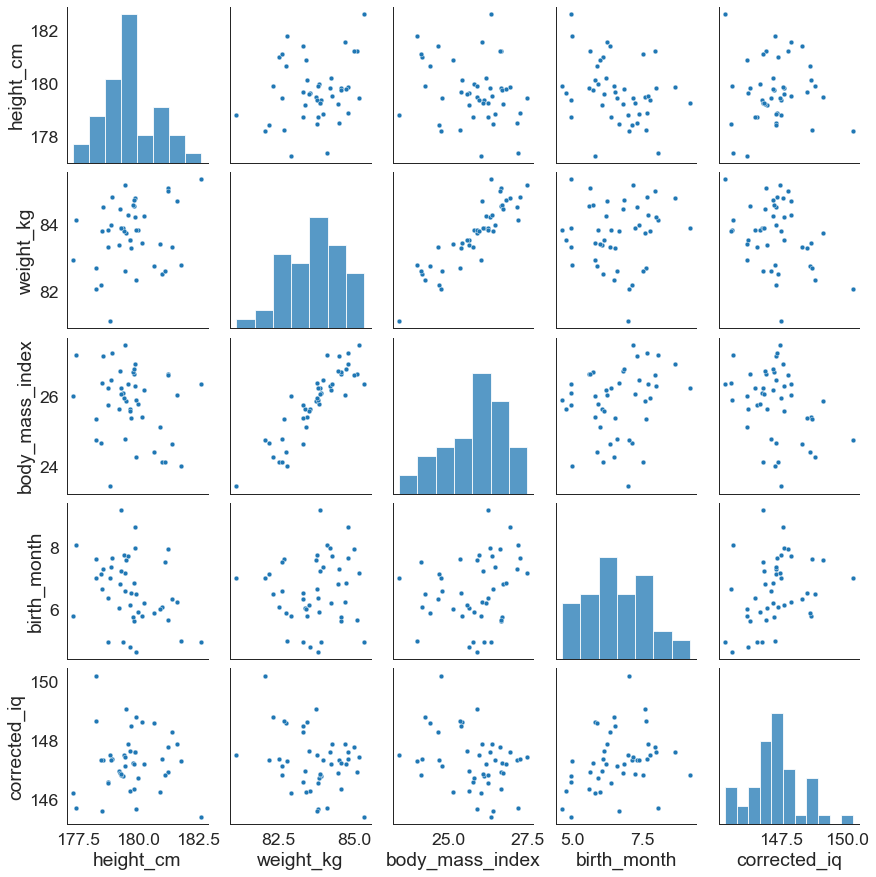

In [17]:
sns.pairplot(new_df)

## Conclusion



## References

<a id='section_id'></a>

[1]  worlddata.info, Average height and weight by country, 2022  https://www.worlddata.info/average-bodyheight.php (with data from NCD Risk Factor Collaboration and the medical journal The Lancet) 

[2]   kaggle.com, Historical US President Physical Data, 8 May 2021 https://www.kaggle.com/datasets/atmcfarland/historical-us-president-physical-data-more?resource=download


[3]  panada.pydata.org, How do I select a subset of a DataFrame,  22 Nov 2022  https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

[4]   statisticshowto.com, beta-distribution, 18 Nov 2022 https://www.statisticshowto.com/beta-distribution/

[5] W3schools.com, Visualization of Normal Distribution, Nov 2022 https://www.w3schools.com/python/numpy/numpy_random_normal.asp

[6]  medium.com, Finding the Best Distribution that Fits Your Data using Python’s Fitter Library, Sept 2022 (https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9) #check for best fit of data

[7]  Wikipedia.org, Pearson_correlation_coefficient, Nov 2022 https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

[8]  codespeedy.com correlation calculation between variables Nov 2022 https://www.codespeedy.com/correlation-calculation-between-variables-in-python/
